In [2]:
from helpers.geometry import *
import math
import matplotlib.pyplot as plt

x = 9.0, y = 8.0, obs = -1 and test:-1
x = 3.0, y = 2.0, obs = -1 and test:-1
x = 6.53, y = 8.35, obs = -1 and test:-1
x = 2.65, y = 4.47, obs = -1 and test:-1
x = 4.05, y = 8.71, obs = -1 and test:-1
x = 2.29, y = 6.95, obs = -1 and test:-1
-----------------------
x = 9.0, y = 8.0, obs = -1 and test:-1
x = 3.0, y = 2.0, obs = -1 and test:-1
x = 2.65, y = 4.47, obs = -1 and test:-1
x = 6.53, y = 8.35, obs = -1 and test:-1
x = 4.05, y = 8.71, obs = -1 and test:-1
x = 2.29, y = 6.95, obs = -1 and test:-1


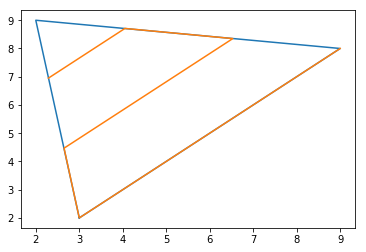

In [4]:
# return list of points
def sweep(vertexes):
    # width of tuolaji
    WIDTH = 2

    edges = []
    maxLength = -1
    maxIndex = -1

    for i in range(len(vertexes)):
        point0 = vertexes[i]
        point1 = vertexes[(i + 1) % len(vertexes)]
        edges.append(Line.getLineFromTwoPoints(point0, point1))

        if edges[i].length() > maxLength:
            maxLength = edges[i].length()
            maxIndex = i

    longestEdge = edges.pop(maxIndex)
    longestEdge.setToInfinite()

    intersections = []
    # intersections.append(vertexes[maxIndex])
    # intersections.append(vertexes[(maxIndex + 1) % len(vertexes)])

    direct = 0
    for vertex in vertexes:
        if longestEdge.relativePosition(vertex) != 0:
            direct = longestEdge.relativePosition(vertex)
            break

    WIDTH = WIDTH * direct

    while not longestEdge.allOnOneSide(vertexes):
        newIntersect = []
        for edge in edges:
            inter = longestEdge.getIntersection(edge)
            if inter is not None:
                newIntersect.append(inter)

        intersections.extend(newIntersect)

        longestEdge = longestEdge.shift(WIDTH)

    for i in intersections:
        print(i)

    reorderIntersections(edges, intersections)

    print("-----------------------")
    for i in intersections:
        print(i)

    return intersections


def reorderIntersections(edges, intersections):
    interCount = []
    for i in range(len(edges)):
        interCount.append(0)

    for inter in intersections:
        for i in range(len(edges)):
            if edges[i].relativePosition(inter) == 0:
                interCount[i] = interCount[i] + 1
                break

    majorEdge = None

    for i in range(len(interCount)):
        if interCount[i] == len(intersections) / 2:
            majorEdge = edges[i]
            break


    direct = 1
    i = 0
    # direct == 1, intersection on major edge at the front
    # direct == -1, intersection on major edge at the back
    while i < len(intersections):
        if direct == 1 & majorEdge.relativePosition(intersections[i]) != 0:
            temp = intersections[i]
            intersections[i] = intersections[i + 1]
            intersections[i + 1] = temp
        elif direct == -1 & majorEdge.relativePosition(intersections[i + 1]) != 0:
            temp = intersections[i]
            intersections[i] = intersections[i + 1]
            intersections[i + 1] = temp

        direct = 0 - direct
        i = i + 2

class Line:
    def __init__(self, vertical, x, k = -1, b = -1, minX = -1, minY = -1, maxX = -1, maxY = -1):
        self.vertical = vertical
        self.x = x
        self.k = k
        self.b = b
        self.minX = minX
        self.minY = minY
        self.maxX = maxX
        self.maxY = maxY


    def equals(self, line1):
        if self.vertical & line1.vertical:
            return self.x == line1.x
        elif self.vertical | line1.vertical:
            return False
        else:
            return self.k == line1.k & self.b == line1.b

    @staticmethod
    def getLineFromTwoPoints(point1, point2):
        x1 = point1.x
        y1 = point1.y
        x2 = point2.x
        y2 = point2.y

        if x1 == x2:
            return Line(True, x1, -1, -1, min(x1, x2), min(y1, y2), max(x1, x2), max(y1, y2))
        else:
            k = (y1 - y2) / (x1 - x2)
            b = (x1 * y2 - x2 * y1) / (x1 - x2)
            return Line(False, -1, k, b, min(x1, x2), min(y1, y2), max(x1, x2), max(y1, y2))

    # a infinite line call this function to intersect with finite line
    def getIntersection(self, line2):
        k1 = self.k
        b1 = self.b
        k2 = line2.k
        b2 = line2.b


        if self.vertical & line2.vertical:
            return None
        elif self.vertical | line2.vertical:
            if self.vertical:
                x = self.x
                y = round(line2.k * x + line2.b, 2)
            else:
                x = line2.x
                y = round(self.k * x + self.b, 2)
        else:
            if k1 == k2: return None

            x = round((b2 - b1) / (k1 - k2), 2)
            y = round((b2 * k1 - b1 * k2) / (k1 - k2), 2)

        if (x >= line2.minX) & (x <= line2.maxX) & (y >= line2.minY) & (y <= line2.maxY):
            return point(x, y)
        else:
            return None

    # return 1 if point is above the line
    # -1 if point is below the line
    # 0 if point is on the line
    def relativePosition(self, point0):
        if self.vertical:
            if point0.x > self.x: return 1
            elif point0.x < self.x: return -1
            else: return 0
        else:
            yOfLine = round(self.k * point0.x + self.b, 2)
            yOfPoint = point0.y

            if yOfPoint > yOfLine: return 1
            elif yOfPoint < yOfLine: return -1
            else: return 0


    def allOnOneSide(self, listOfPoints):
        position0 = self.relativePosition(listOfPoints[0])
        for i in range(1, len(listOfPoints)):
            if(self.relativePosition(listOfPoints[i]) != position0):
                return False

        return True

    # return a new Line
    # width > 0, shift up or right
    # width < 0, shift down or left
    def shift(self, width):
        if self.vertical:
            return Line(True, self.x + width)
        else:
            delta = math.sqrt(1 + self.k * self.k) * width
            newB = self.b + delta
            return Line(False, -1, self.k, newB)


    def length(self):
        if self.minX == -1 & self.minY == -1 & self.maxX == -1 & self.maxY == -1:
            return -1
        else:
            return math.sqrt((self.maxX - self.minX) ** 2 + (self.maxY - self.minY) ** 2)


    def setToInfinite(self):
        self.minX = -1
        self.minY = -1
        self.maxX = -1
        self.maxY = -1









def getLine():
    point0 = point(3, 2)
    point1 = point(9, 8)
    point2 = point(2, 9)
#     point3 = point(1, 8)

    p_list = []
    p_list.append(point0)
    p_list.append(point1)
    p_list.append(point2)
#     list.append(point3)
    x_bndy = [pnt.x for pnt in p_list]
    y_bndy = [pnt.y for pnt in p_list]
    x_bndy.append(x_bndy[0])
    y_bndy.append(y_bndy[0])
    plt.plot(x_bndy, y_bndy)
    

    pnts = sweep(p_list)
    
    x = [pnt.x for pnt in pnts]
    y = [pnt.y for pnt in pnts]

    plt.plot(x, y)




getLine()